In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv("diamonds_new.csv")

In [5]:
data.head()

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,Ideal,E,SI2,55.0,3.95,3.98,2.43,163.0
1,0.21,Premium,E,SI1,61.0,3.89,3.84,2.31,163.0
2,0.23,Good,E,VS1,65.0,4.05,4.07,2.31,163.5
3,0.29,Premium,I,VS2,58.0,4.20,4.23,2.63,167.0
4,0.31,Good,J,SI2,58.0,4.34,4.35,2.75,167.5


In [6]:
data.tail()

,carat,cut,color,clarity,table,x,y,z,price_new
53935,0.72,Ideal,D,SI1,57.0,5.75,5.76,3.50,1378.5
53936,0.72,Good,D,SI1,55.0,5.69,5.75,3.61,1378.5
53937,0.70,Very Good,D,SI1,60.0,5.66,5.68,3.56,1378.5
53938,0.86,Premium,H,SI2,58.0,6.15,6.12,3.74,1378.5
53939,0.75,Ideal,D,SI2,55.0,5.83,5.87,3.64,1378.5


In [7]:
data.shape

(53940, 9)

In [8]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'table', 'x', 'y', 'z',
       'price_new'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53841 non-null  float64
 1   cut        53940 non-null  object 
 2   color      53884 non-null  object 
 3   clarity    53940 non-null  object 
 4   table      53877 non-null  float64
 5   x          53940 non-null  float64
 6   y          53940 non-null  float64
 7   z          53940 non-null  float64
 8   price_new  53940 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.7+ MB


# 1. Missing values

In [10]:

data.isna().sum()

carat        99
cut           0
color        56
clarity       0
table        63
x             0
y             0
z             0
price_new     0
dtype: int64

In [11]:
data.isna().sum()/data.shape[0] * 100

carat        0.183537
cut          0.000000
color        0.103819
clarity      0.000000
table        0.116796
x            0.000000
y            0.000000
z            0.000000
price_new    0.000000
dtype: float64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53841 non-null  float64
 1   cut        53940 non-null  object 
 2   color      53884 non-null  object 
 3   clarity    53940 non-null  object 
 4   table      53877 non-null  float64
 5   x          53940 non-null  float64
 6   y          53940 non-null  float64
 7   z          53940 non-null  float64
 8   price_new  53940 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.7+ MB


In [13]:
#handling Missing Values on Catagorical data
data["color"]

0        E
1        E
2        E
3        I
4        J
        ..
53935    D
53936    D
53937    D
53938    H
53939    D
Name: color, Length: 53940, dtype: object

In [14]:
data["color"].value_counts()

G    11236
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [15]:
## replace most repeated vales in the missing value coloum
data["color"]=data["color"].fillna("G")

In [16]:
data.isna().sum()

carat        99
cut           0
color         0
clarity       0
table        63
x             0
y             0
z             0
price_new     0
dtype: int64

In [17]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'frequency')

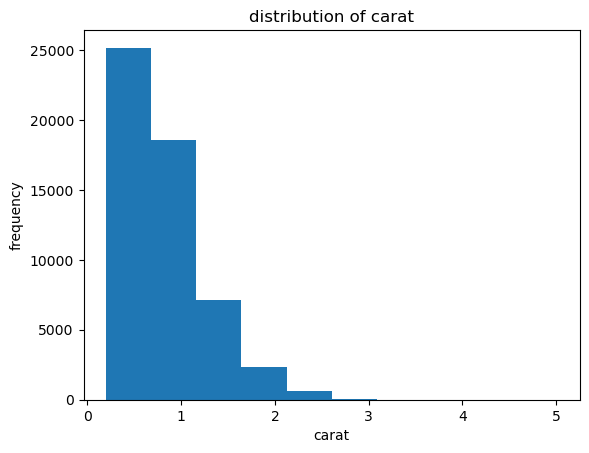

In [18]:
plt.hist(data['carat'])
plt.title("distribution of carat")
plt.xlabel("carat")
plt.ylabel("frequency")

In [19]:
##carat is skewed distrubation disrtubation, therefore  find median
data_carat=data['carat'].median()

In [20]:
data['carat']=data['carat'].fillna(data_carat)

In [21]:
data.isna().sum()

carat         0
cut           0
color         0
clarity       0
table        63
x             0
y             0
z             0
price_new     0
dtype: int64

Text(0, 0.5, 'frequency')

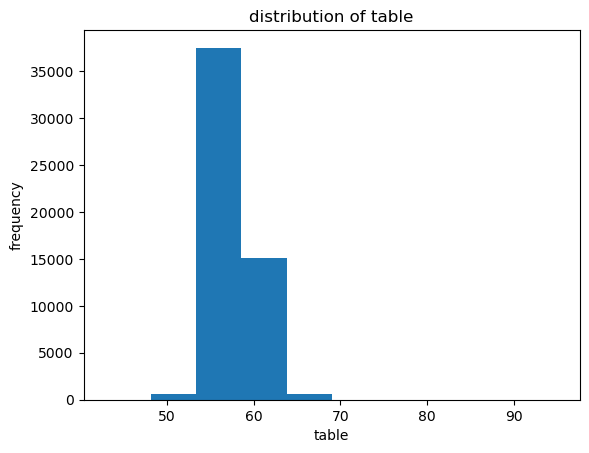

In [22]:
plt.hist(data['table'])
plt.title("distribution of table")
plt.xlabel("table")
plt.ylabel("frequency")

In [23]:
## table is skewed distrubation 
data_table=data['table'].median()

In [24]:
data['table']= data['table'].fillna(data_table)

In [25]:
data.isna().sum()

carat        0
cut          0
color        0
clarity      0
table        0
x            0
y            0
z            0
price_new    0
dtype: int64

# outlayers

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53940 non-null  float64
 1   cut        53940 non-null  object 
 2   color      53940 non-null  object 
 3   clarity    53940 non-null  object 
 4   table      53940 non-null  float64
 5   x          53940 non-null  float64
 6   y          53940 non-null  float64
 7   z          53940 non-null  float64
 8   price_new  53940 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.7+ MB


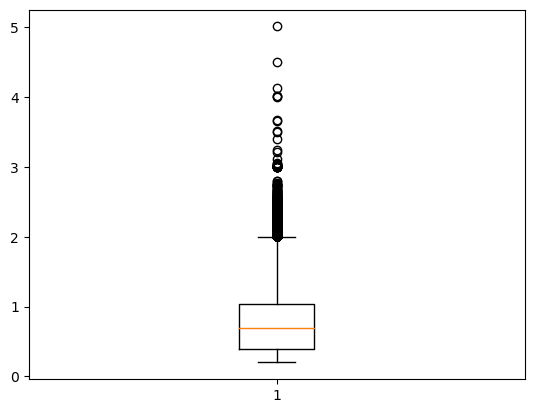

In [27]:
### for finding outlayers there are two method IQR method and Z square metghod
###IQR method-drow a box polt and find if there is any points layed on upper boundary and lower boundary

plt.boxplot(data['carat'])
plt.show();

In [28]:
data['carat'].describe()

### if there is huge difference between 75% value and max value then there will be outlayer.

count    53940.000000
mean         0.797940
std          0.474011
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64

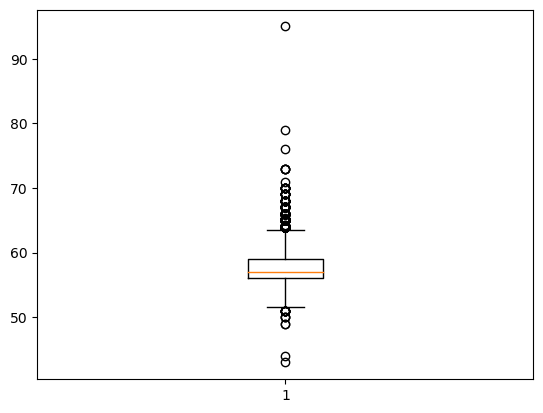

In [29]:
plt.boxplot(data['table'])
plt.show();

In [30]:
data['table'].describe()
## there is huge  difference between 75% and Max value.there for there is a outlayer 

count    53940.000000
mean        57.457184
std          2.234491
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

# 3a-Handling outlayers

### Transforming
##2(A)-square root transformation -simple mrthod -finding square root of rate 

In [31]:
data['squre_carat']=data['carat']** 0.5

In [32]:
data

,carat,cut,color,clarity,table,x,y,z,price_new,squre_carat
0,0.23,Ideal,E,SI2,55.0,3.95,3.98,2.43,163.0,0.479583
1,0.21,Premium,E,SI1,61.0,3.89,3.84,2.31,163.0,0.458258
2,0.23,Good,E,VS1,65.0,4.05,4.07,2.31,163.5,0.479583
3,0.29,Premium,I,VS2,58.0,4.20,4.23,2.63,167.0,0.538516
4,0.31,Good,J,SI2,58.0,4.34,4.35,2.75,167.5,0.556776
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,57.0,5.75,5.76,3.50,1378.5,0.848528
53936,0.72,Good,D,SI1,55.0,5.69,5.75,3.61,1378.5,0.848528
53937,0.70,Very Good,D,SI1,60.0,5.66,5.68,3.56,1378.5,0.836660
53938,0.86,Premium,H,SI2,58.0,6.15,6.12,3.74,1378.5,0.927362


In [33]:
data['squre_table']=data['table']** 0.5

In [34]:
data

,carat,cut,color,clarity,table,x,y,z,price_new,squre_carat,squre_table
0,0.23,Ideal,E,SI2,55.0,3.95,3.98,2.43,163.0,0.479583,7.416198
1,0.21,Premium,E,SI1,61.0,3.89,3.84,2.31,163.0,0.458258,7.810250
2,0.23,Good,E,VS1,65.0,4.05,4.07,2.31,163.5,0.479583,8.062258
3,0.29,Premium,I,VS2,58.0,4.20,4.23,2.63,167.0,0.538516,7.615773
4,0.31,Good,J,SI2,58.0,4.34,4.35,2.75,167.5,0.556776,7.615773
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,57.0,5.75,5.76,3.50,1378.5,0.848528,7.549834
53936,0.72,Good,D,SI1,55.0,5.69,5.75,3.61,1378.5,0.848528,7.416198
53937,0.70,Very Good,D,SI1,60.0,5.66,5.68,3.56,1378.5,0.836660,7.745967
53938,0.86,Premium,H,SI2,58.0,6.15,6.12,3.74,1378.5,0.927362,7.615773


# 4.Scaling

In [35]:
avg_carat=data['carat'].mean()
std_carat=data['carat'].std()

In [36]:
data['z_score_carat']= (data['carat'] - avg_carat) /std_carat

In [37]:
avg_table=data['table'].mean()
std_table=data['table'].std()

In [38]:
data['z_score_table']= (data['table'] -avg_table) / std_table

In [39]:
data

,carat,cut,color,clarity,table,x,y,z,price_new,squre_carat,squre_table,z_score_carat,z_score_table
0,0.23,Ideal,E,SI2,55.0,3.95,3.98,2.43,163.0,0.479583,7.416198,-1.198157,-1.099662
1,0.21,Premium,E,SI1,61.0,3.89,3.84,2.31,163.0,0.458258,7.810250,-1.240350,1.585514
2,0.23,Good,E,VS1,65.0,4.05,4.07,2.31,163.5,0.479583,8.062258,-1.198157,3.375631
3,0.29,Premium,I,VS2,58.0,4.20,4.23,2.63,167.0,0.538516,7.615773,-1.071577,0.242926
4,0.31,Good,J,SI2,58.0,4.34,4.35,2.75,167.5,0.556776,7.615773,-1.029384,0.242926
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,57.0,5.75,5.76,3.50,1378.5,0.848528,7.549834,-0.164426,-0.204603
53936,0.72,Good,D,SI1,55.0,5.69,5.75,3.61,1378.5,0.848528,7.416198,-0.164426,-1.099662
53937,0.70,Very Good,D,SI1,60.0,5.66,5.68,3.56,1378.5,0.836660,7.745967,-0.206619,1.137985
53938,0.86,Premium,H,SI2,58.0,6.15,6.12,3.74,1378.5,0.927362,7.615773,0.130926,0.242926


# 5. Encoding

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          53940 non-null  float64
 1   cut            53940 non-null  object 
 2   color          53940 non-null  object 
 3   clarity        53940 non-null  object 
 4   table          53940 non-null  float64
 5   x              53940 non-null  float64
 6   y              53940 non-null  float64
 7   z              53940 non-null  float64
 8   price_new      53940 non-null  float64
 9   squre_carat    53940 non-null  float64
 10  squre_table    53940 non-null  float64
 11  z_score_carat  53940 non-null  float64
 12  z_score_table  53940 non-null  float64
dtypes: float64(10), object(3)
memory usage: 5.4+ MB


In [41]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'table', 'x', 'y', 'z', 'price_new',
       'squre_carat', 'squre_table', 'z_score_carat', 'z_score_table'],
      dtype='object')

In [42]:
data['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [43]:
dict1={'E':1,'I':2,'J':3,'H':4,'F':5,'G':6,'D':7}

In [44]:
data['color']=data['color'].map(dict1)

In [45]:
data

,carat,cut,color,clarity,table,x,y,z,price_new,squre_carat,squre_table,z_score_carat,z_score_table
0,0.23,Ideal,1,SI2,55.0,3.95,3.98,2.43,163.0,0.479583,7.416198,-1.198157,-1.099662
1,0.21,Premium,1,SI1,61.0,3.89,3.84,2.31,163.0,0.458258,7.810250,-1.240350,1.585514
2,0.23,Good,1,VS1,65.0,4.05,4.07,2.31,163.5,0.479583,8.062258,-1.198157,3.375631
3,0.29,Premium,2,VS2,58.0,4.20,4.23,2.63,167.0,0.538516,7.615773,-1.071577,0.242926
4,0.31,Good,3,SI2,58.0,4.34,4.35,2.75,167.5,0.556776,7.615773,-1.029384,0.242926
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,7,SI1,57.0,5.75,5.76,3.50,1378.5,0.848528,7.549834,-0.164426,-0.204603
53936,0.72,Good,7,SI1,55.0,5.69,5.75,3.61,1378.5,0.848528,7.416198,-0.164426,-1.099662
53937,0.70,Very Good,7,SI1,60.0,5.66,5.68,3.56,1378.5,0.836660,7.745967,-0.206619,1.137985
53938,0.86,Premium,4,SI2,58.0,6.15,6.12,3.74,1378.5,0.927362,7.615773,0.130926,0.242926


In [46]:
data['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [47]:
dict1={'Ideal':1,'Premium':2,'Good':3,'Very Good':4,'Fair':5}

In [49]:
data['cut']=data['cut'].map(dict1)

In [50]:
data

,carat,cut,color,clarity,table,x,y,z,price_new,squre_carat,squre_table,z_score_carat,z_score_table
0,0.23,1,1,SI2,55.0,3.95,3.98,2.43,163.0,0.479583,7.416198,-1.198157,-1.099662
1,0.21,2,1,SI1,61.0,3.89,3.84,2.31,163.0,0.458258,7.810250,-1.240350,1.585514
2,0.23,3,1,VS1,65.0,4.05,4.07,2.31,163.5,0.479583,8.062258,-1.198157,3.375631
3,0.29,2,2,VS2,58.0,4.20,4.23,2.63,167.0,0.538516,7.615773,-1.071577,0.242926
4,0.31,3,3,SI2,58.0,4.34,4.35,2.75,167.5,0.556776,7.615773,-1.029384,0.242926
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,1,7,SI1,57.0,5.75,5.76,3.50,1378.5,0.848528,7.549834,-0.164426,-0.204603
53936,0.72,3,7,SI1,55.0,5.69,5.75,3.61,1378.5,0.848528,7.416198,-0.164426,-1.099662
53937,0.70,4,7,SI1,60.0,5.66,5.68,3.56,1378.5,0.836660,7.745967,-0.206619,1.137985
53938,0.86,2,4,SI2,58.0,6.15,6.12,3.74,1378.5,0.927362,7.615773,0.130926,0.242926


In [52]:
data['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [53]:
dict1={'SI2':1,'SI1':2,'VS1':3,'VS2':4,'VVS2':5,'VVS1':6,'I1':7,'IF':8}

In [54]:
data['clarity']=data['clarity'].map(dict1)

In [55]:
data

,carat,cut,color,clarity,table,x,y,z,price_new,squre_carat,squre_table,z_score_carat,z_score_table
0,0.23,1,1,1,55.0,3.95,3.98,2.43,163.0,0.479583,7.416198,-1.198157,-1.099662
1,0.21,2,1,2,61.0,3.89,3.84,2.31,163.0,0.458258,7.810250,-1.240350,1.585514
2,0.23,3,1,3,65.0,4.05,4.07,2.31,163.5,0.479583,8.062258,-1.198157,3.375631
3,0.29,2,2,4,58.0,4.20,4.23,2.63,167.0,0.538516,7.615773,-1.071577,0.242926
4,0.31,3,3,1,58.0,4.34,4.35,2.75,167.5,0.556776,7.615773,-1.029384,0.242926
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,1,7,2,57.0,5.75,5.76,3.50,1378.5,0.848528,7.549834,-0.164426,-0.204603
53936,0.72,3,7,2,55.0,5.69,5.75,3.61,1378.5,0.848528,7.416198,-0.164426,-1.099662
53937,0.70,4,7,2,60.0,5.66,5.68,3.56,1378.5,0.836660,7.745967,-0.206619,1.137985
53938,0.86,2,4,1,58.0,6.15,6.12,3.74,1378.5,0.927362,7.615773,0.130926,0.242926


In [56]:
from sklearn.preprocessing import LabelEncoder

In [57]:
##create a instance of label encoding
le= LabelEncoder()

In [63]:
x=data.drop("cut",axis=1) ## x contain independant variable

In [64]:
x

,carat,color,clarity,table,x,y,z,price_new,squre_carat,squre_table,z_score_carat,z_score_table
0,0.23,1,1,55.0,3.95,3.98,2.43,163.0,0.479583,7.416198,-1.198157,-1.099662
1,0.21,1,2,61.0,3.89,3.84,2.31,163.0,0.458258,7.810250,-1.240350,1.585514
2,0.23,1,3,65.0,4.05,4.07,2.31,163.5,0.479583,8.062258,-1.198157,3.375631
3,0.29,2,4,58.0,4.20,4.23,2.63,167.0,0.538516,7.615773,-1.071577,0.242926
4,0.31,3,1,58.0,4.34,4.35,2.75,167.5,0.556776,7.615773,-1.029384,0.242926
...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,7,2,57.0,5.75,5.76,3.50,1378.5,0.848528,7.549834,-0.164426,-0.204603
53936,0.72,7,2,55.0,5.69,5.75,3.61,1378.5,0.848528,7.416198,-0.164426,-1.099662
53937,0.70,7,2,60.0,5.66,5.68,3.56,1378.5,0.836660,7.745967,-0.206619,1.137985
53938,0.86,4,1,58.0,6.15,6.12,3.74,1378.5,0.927362,7.615773,0.130926,0.242926


In [62]:
y=data["cut"] ## y contain dependant variable

In [61]:
y

0        1
1        2
2        3
3        2
4        3
        ..
53935    1
53936    3
53937    4
53938    2
53939    1
Name: cut, Length: 53940, dtype: int64